# ConSciScanner - Readability in Py27

This notebook should be run in a Python 2 environment.

It also assumes 'textstat' is installed, which can be done with:

$ pip install textstat

In [29]:
%matplotlib inline

import os

import matplotlib.pyplot as plt

# Import textstat
from textstat.textstat import textstatistics

# Import custom code
from consc.data import load_folder

In [2]:
# Add paths for custom code & data
base_path = os.path.dirname(os.getcwd())
dat_path = os.path.join(base_path, 'Data')

In [17]:
# Set term to analyze
current_term = 'optogenetics'

# Load the data
paper_dat = load_folder('Papers', current_term, dat_path)
press_dat = load_folder('PRs', current_term, dat_path)

In [5]:
# Initialize textstat object
ts = textstatistics()

In [6]:
# Set an index to test run analysis on
ind = 5

In [7]:
print('Syllable Count:')
print(ts.syllable_count(paper_dat[ind].text))
print(ts.syllable_count(press_dat[ind].text))

Syllable Count:
332
1396


In [8]:
print('Flesh-Kincaid Ease:')
print(ts.flesch_reading_ease(paper_dat[ind].text))
print(ts.flesch_reading_ease(press_dat[ind].text))

Flesh-Kincaid Ease:
20.72
22.34


In [9]:
print('Flesh-Kincaid Grade:')
print(ts.flesch_kincaid_grade(paper_dat[ind].text))
print(ts.flesch_kincaid_grade(press_dat[ind].text))

Flesh-Kincaid Grade:
16.6
16.0


In [10]:
print('Automated Readability Index:')
print(ts.automated_readability_index(paper_dat[ind].text))
print(ts.automated_readability_index(press_dat[ind].text))

Automated Readability Index:
19.6
18.7


In [11]:
print('Coleman Liau Index:')
print(ts.coleman_liau_index(paper_dat[ind].text))
print(ts.coleman_liau_index(press_dat[ind].text))

Coleman Liau Index:
18.11
17.99


In [12]:
print('Dale Chall Readability Score:')
print(ts.dale_chall_readability_score(paper_dat[ind].text))
print(ts.dale_chall_readability_score(press_dat[ind].text))

Dale Chall Readability Score:
11.19
9.72


In [13]:
print('Gunning Fog:')
print(ts.gunning_fog(paper_dat[ind].text))
print(ts.gunning_fog(press_dat[ind].text))

Gunning Fog:
28.0
23.8198930481


In [14]:
print('Smog Index:')
print(ts.smog_index(paper_dat[ind].text))
print(ts.smog_index(press_dat[ind].text))

Smog Index:
17.1
17.1


In [15]:
print('Linsear Write Formula:')
print(ts.linsear_write_formula(paper_dat[ind].text))
print(ts.linsear_write_formula(press_dat[ind].text))

Linsear Write Formula:
12.0
12.8


In [16]:
print('Consensus measure (text-standard):')
print(ts.text_standard(paper_dat[ind].text))
print(ts.text_standard(press_dat[ind].text))

Consensus measure (text-standard):
16th and 17th grade
17th and 18th grade


In [18]:
import numpy as np

In [19]:
np.save?

In [22]:
scripts_path = '/Users/tom/Documents/GitCode/Confidence_Scanner/scripts/'
res_path = '/Users/tom/Documents/GitCode/Confidence_Scanner/scripts/results/'

In [26]:
d1 = np.load(res_path + 'vaccines' +  '_fk_papers.npy')
d2 = np.load(res_path + 'vaccines' +  '_fk_presss.npy')

In [38]:
plt.hist?

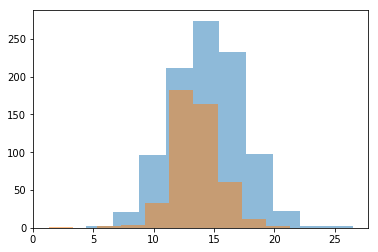

In [41]:
plt.hist(d1, alpha=0.5);
plt.hist(d2, alpha=0.5);

In [35]:
from scipy.stats import ttest_ind

In [36]:
ttest_ind(d1, d2)

Ttest_indResult(statistic=6.9260580781303362, pvalue=6.5398842854581966e-12)